In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
aapl = pd.read_csv('./All_Data/5ydata/AAPL.csv',delimiter = ',')
aapl_daily_ret = aapl['Adj Close'].pct_change()
aapl_log = np.log(1+ aapl_daily_ret)

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


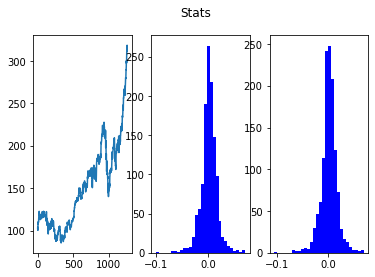

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Stats')
ax1.plot(aapl['Adj Close'])
ax2.hist(aapl_daily_ret.values,bins = 30,color = 'b')
ax3.hist(aapl_log.values,bins = 30,color = 'b')
plt.show()


In [4]:
'''
MONTE CARLO SIMULATION

'''
from scipy.stats import norm

def Monte_Carlo(log_returns,sim_length,sim_iterations):
    
    u = log_returns.mean()

    var = log_returns.var()

    drift = u - (0.5 * var)

    # Calculating the standard deviation of log returns

    stdev = log_returns.std()
    stdev = np.array(stdev)
    drift = np.array(drift)

    t_intervals = sim_length
    iterations = sim_iterations

    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = 1

    price_list = np.zeros_like(daily_returns)

    # Replace the first row with the first price
    price_list[0] = S0


    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    
    return price_list,daily_returns

In [5]:
MCS,daily_returns = Monte_Carlo(aapl_log,72,1000)

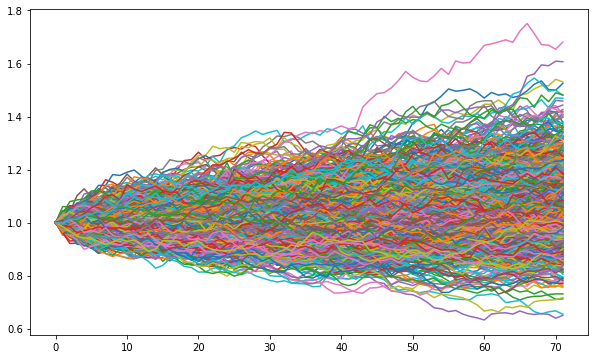

In [6]:
plt.figure(figsize=(10,6))
plt.plot(MCS)
#plt.plot(testing.values,linewidth =4)
plt.show()

In [7]:
def print_MCS_Stats(MCS,sim_length):
    print("The mean ending value of the simulations :",np.mean(MCS[-1]))
    print("The median ending value of the simulations :",np.median(MCS[-1]))
    print("The standard deviation of ending value of the simulations :",np.std(MCS[-1]))
    #print("The variance of the ending value of simulations :",np.var(price_list[-1]))
    print("The confidence of 95% the fluctations deviate in +/-: ", 1.96*np.std(MCS[-1]))
    print("The 95% percentile : ", np.percentile(MCS[-1], 95))
    print("The 90% percentile : ", np.percentile(MCS[-1], 90))
    print("The 75% percentile : ", np.percentile(MCS[-1], 75))
    print("The 50% percentile : ", np.percentile(MCS[-1], 50))
    print("The 35% percentile : ", np.percentile(MCS[-1], 35))
    print("The 20% percentile : ", np.percentile(MCS[-1], 20))
    print("The 10% percentile : ", np.percentile(MCS[-1], 10))
    print("The 5% percentile : ", np.percentile(MCS[-1], 5))
    print("The 2% percentile : ", np.percentile(MCS[-1], 2))
    print("The 1% percentile : ", np.percentile(MCS[-1], 1))
    
    percentiles = []
    
    for i in range(1,100):
        percentiles.append(np.percentile(MCS[-1],i))
    
    positives = []
    
    for i in range(len(percentiles)):
        percentiles[i] = (percentiles[i] - 1)*100
        if percentiles[i] >0:
            positives.append(True)
        else:
            positives.append(False)
            
    positives = pd.Series(positives)
    
    fig = plt.figure(figsize=(10,4))    
    plt.bar(np.arange(1,len(percentiles)+1),percentiles,color=positives.map({True: 'g', False: 'r'}),width = 0.5)
    plt.axhline(0,color='black')
    plt.ylabel('Percentage Returns across Quarters')
    plt.xlabel('Quarters')
    plt.title('Percentile Return')
    plt.show()

The mean ending value of the simulations : 1.0579509593581082
The median ending value of the simulations : 1.0440849165742336
The standard deviation of ending value of the simulations : 0.1404031413102218
The confidence of 95% the fluctations deviate in +/-:  0.2751901569680347
The 95% percentile :  1.2995849329245734
The 90% percentile :  1.2334536475627362
The 75% percentile :  1.1486453162235426
The 50% percentile :  1.0440849165742336
The 35% percentile :  0.9956918055538261
The 20% percentile :  0.9370755027284225
The 10% percentile :  0.8901146886334744
The 5% percentile :  0.8510429996781169
The 2% percentile :  0.810189029790026
The 1% percentile :  0.7743233858085421


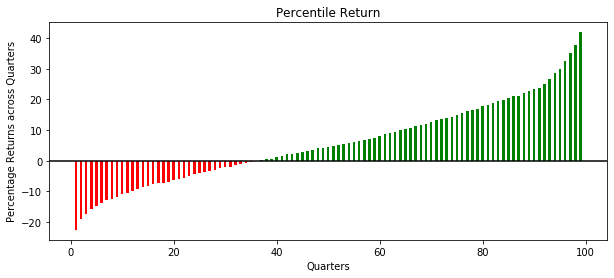

In [8]:
print_MCS_Stats(MCS,100)

In [9]:
daily_returns[:,0]

array([1.01709326, 0.98421021, 1.00847099, 1.00263515, 0.99561505,
       0.97446603, 1.01126652, 1.00941274, 0.99435981, 1.02883401,
       0.99579436, 1.01956093, 1.02428991, 0.97496573, 1.00143494,
       0.99483147, 0.99482535, 0.98843898, 1.01288757, 0.99795169,
       1.02618017, 1.02822162, 0.9990034 , 1.00221549, 1.00416424,
       1.01253551, 1.01677015, 0.99836671, 0.99668531, 0.97092895,
       0.95507985, 1.0179771 , 0.9947135 , 1.00581543, 0.98676567,
       1.02997143, 1.01263341, 0.99612707, 0.96878675, 1.00235236,
       1.01322445, 0.99334157, 1.00158793, 1.00715221, 1.00258121,
       0.9740871 , 0.99277266, 1.01316121, 0.98923102, 0.986048  ,
       1.01002808, 1.01378617, 1.01539486, 1.01436278, 0.99176245,
       0.99136233, 0.99978015, 0.98651376, 1.0093552 , 0.97611762,
       1.00303919, 1.0006506 , 1.01846274, 0.99349115, 0.99392305,
       0.99925074, 1.0083349 , 0.98281795, 0.98243513, 1.00746602,
       1.00294098, 0.98628034])

# Getting Portfolio

In [10]:
preds = pd.read_csv('./All_Data/Labels_and_Preds/Predictions_RF.csv',delimiter = ',')
labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter = ',')
preds = preds.set_index('Unnamed: 0')
labels = labels.set_index('Unnamed: 0')
preds

,0,1,2,3,4,5,6,7
Unnamed: 0,,,,,,,,
A_quarterly_financial_data.csv,0.044918,0.045542,0.027961,0.025301,0.038655,-0.056372,0.062687,-0.001568
AMR_quarterly_financial_data.csv,0.008350,0.040495,0.043096,-0.022365,0.017863,0.068810,-0.023634,-0.049112
AAN_quarterly_financial_data.csv,-0.000303,-0.016183,0.066897,0.000702,0.008399,0.054607,0.034513,-0.002771
AAPL_quarterly_financial_data.csv,0.042946,0.100452,0.085442,0.059981,0.048604,0.105756,0.084291,-0.004292
ABMD_quarterly_financial_data.csv,0.043904,0.070271,0.098091,0.064346,0.073424,0.064765,0.042740,0.037957
ABT_quarterly_financial_data.csv,0.019278,0.014751,-0.021837,0.025121,0.014601,-0.043980,-0.028077,-0.005179
ADBE_quarterly_financial_data.csv,0.069512,0.058851,0.047808,0.083061,0.092164,0.075550,0.003508,0.007871
ADI_quarterly_financial_data.csv,0.041908,0.063493,0.036354,0.053007,0.008013,0.014362,0.003429,0.020289
ADM_quarterly_financial_data.csv,0.011261,-0.021717,0.032625,0.043857,0.018551,0.029548,-0.001492,0.004030


In [11]:
def get_index_names(df):
    names = []

    for i in range(len(df.index.values)):
        name = str(df.index.values[i])
        name = name.split('_')
        names.append(str(name[0]))
        
    return names

In [12]:
def give_quarter_performance_of_size_X(Predictions,Labels,quarter,X):
    '''
    
    Arguments:
    
    Predictions - A dataframe containing the predictions of each stock for the upcoming quarters (8)
    Labels - A dataframe containing the labels of each stock for the upcoming 8 quarters
    quarter - the required quarter to calculate performance
    
    
    Returns:
    
    A dataframe containing the predictions and labels for the top 30 stocks in that quarter
    
    '''
    quarter = str(quarter)
    Q = Predictions[quarter]
    Q_labels = Labels[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_X = Q[:X]
    
    top_X_labels = []

    for index in Q_top_X.index:
        row = Q_labels.loc[index]
        top_X_labels.append(row)
    
    labels_series = pd.Series(top_X_labels)
    quarter_portfolio = pd.DataFrame({'Preds': Q_top_X.values,'Labels': labels_series.values}
                            ,index=Q_top_X.index)
    
    return quarter_portfolio
    '''
    quarter = str(quarter)
    Q = Predictions[quarter]
    Q_labels = Labels[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[index]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    quarter_portfolio = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return quarter_portfolio
    '''

In [13]:
q1_p = give_quarter_performance_of_size_X(preds,labels,1,20)
q1_names = get_index_names(q1_p)
print(q1_names)

['AMZN', 'ALGN', 'ISRG', 'NVDA', 'CIEN', 'JBL', 'CAT', 'GE', 'AAPL', 'EQIX', 'ILMN', 'MU', 'KSS', 'PKG', 'FFIV', 'DHR', 'ARW', 'IDXX', 'HUM', 'AMAT']


In [14]:
def give_data_upto_quarter(quarter,stock):
    dates = ['2017-06-30','2017-09-30','2017-12-31','2018-03-31',
             '2018-06-30','2018-09-30','2018-12-31','2019-03-31']
    
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock.set_index('Date')
    return stock[:dates[quarter]]

In [15]:
def MCS_Quarter(quarter_names,quarter,sim_length,num_simulations):
    '''
    arguments:
    
    1. quarter_names -: A series of names that are in the quarter portfolio
    
    2. quarter :  quarter for which random walks must be generated
    
    3. num_simulations -: number of random walks per stock
    
    4. sim_length -: length of the random walk
    
    
    returns:
    
    MCS_Quarter -: A dictionary conatining random walk matrices for every stock in the portfolio
    
    '''
    MCS_Quarter = {}
    for name in quarter_names:
        s=1
        try:
            stock = pd.read_csv('./All_Data/5ydata/'+name+'.csv',delimiter = ',')
            stock = give_data_upto_quarter(quarter,stock)
            stock_log = np.log(1 + stock['Adj Close'].pct_change())
            MCS,Daily = Monte_Carlo(stock_log,sim_length,num_simulations)
            MCS_Quarter[name] = MCS
        except:
            s=2
    
    return MCS_Quarter

In [51]:
def MCS_Returns_Quarter(MCS_Quarter,num_simulations,sim_length):
    '''
    arguments:
    
    1. MCS_Quarter -: A dictionary containing the MCS matrix for every stock in the portfolio
    for that particular quarter
    
    2. num_simulations -: number of random walks per stock
    
    3. sim_length -: length of the random walk
    
    
    returns:
    
    all_sims -: aggregated porfolio random walks, same number of walks as num_simulatons
    
    '''
    #GETTING NAMES OF QUARTER PORTFOLIO STOCKS
    keys = MCS_Quarter.keys()
    
    all_sims = []
    
    
    for i in range(num_simulations):
        one_sim = np.zeros(sim_length)
        for key in keys:
            stock = MCS_Quarter[key]
            #ADD THE RANDOM WALKS TOGETHER TO GET PORTFOLIO AVERAGE
            one_sim += stock[:,np.random.randint(0,num_simulations)]
            #one_sim += stock[:,i]

        #NORMALIZE
        one_sim = one_sim/one_sim[0]
        all_sims.append(one_sim)
    
    return all_sims

In [34]:
MCS_Daily = MCS_Quarter(q1_names,0,63,100)

In [35]:
MCS_Returns_Q = MCS_Returns_Quarter(MCS_Daily,100,63)

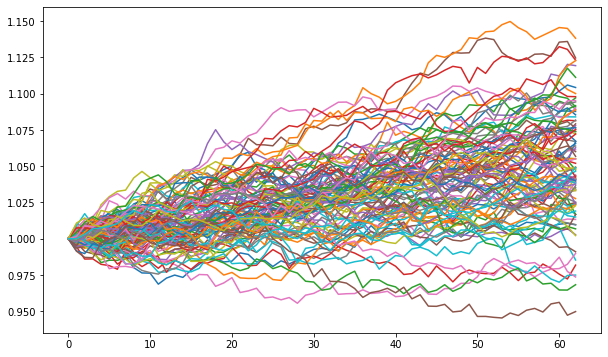

In [36]:
plt.figure(figsize=(10,6))
plt.plot(np.array(MCS_Returns_Q).T)
#plt.plot(testing.values,linewidth =4)
plt.show()

# Quarter Wise MCS

In [37]:
def MCS_Portfolio_One_Quarter(preds,labels,quarter,sim_length,num_simulations,portfolio_size):
    '''
    Returns -: A row of the ending values of all random walks of the portfolio
    '''
    quarter_portfolio = give_quarter_performance_of_size_X(preds,labels,quarter,portfolio_size)
    quarter_names = get_index_names(quarter_portfolio)
    
    MCS_Daily = MCS_Quarter(q1_names,quarter,sim_length,num_simulations)
    MCS_Returns_Q = MCS_Returns_Quarter(MCS_Daily,num_simulations,sim_length)
    
    MCS = np.array(MCS_Returns_Q).T
    
    #plt.figure(figsize=(10,6))
    #plt.plot(MCS)
    #plt.plot(testing.values,linewidth =4)
    #plt.show()
    
    #print_MCS_Stats(MCS,sim_length)
    
    return MCS[-1]
    

In [38]:
MCS_Result = MCS_Portfolio_One_Quarter(preds,labels,0,63,1000,30)

# Generate MCS for all 8 quarters 

In [39]:
MCS_returns_all_quarters = []
for i in range(8):
    MCS_return = MCS_Portfolio_One_Quarter(preds,labels,i,63,1000,30)
    MCS_returns_all_quarters.append(MCS_return)

In [40]:
def MCS_all_quarters(MCS_returns_all_quarters,MCS_sims,num_simulations):
    all_sims = []
    for i in range(MCS_sims):
        onesim = []
        for j in range(8):
            value = MCS_returns_all_quarters[j][np.random.randint(0,num_simulations)]
            onesim.append(value)
        all_sims.append(onesim)
    
    all_sims = np.array(all_sims).T
    #all_sims = np.array(all_sims)
    price_list_2 = np.ones(np.shape(all_sims))
    for t in range(1, 8):
        price_list_2[t] = price_list_2[t - 1] * all_sims[t]

    #fig = plt.figure(figsize=(10,5))
    #plt.plot(price_list_2)
    #plt.show()
    return price_list_2

In [41]:
def Full_MCS_Stats(MCS):
    print("The mean ending value of the simulations :",np.mean(MCS[-1]))
    print("The median ending value of the simulations :",np.median(MCS[-1]))
    print("The standard deviation of ending value of the simulations :",np.std(MCS[-1]))
    #print("The variance of the ending value of simulations :",np.var(price_list[-1]))
    print("The confidence of 95% the fluctations deviate in +/-: ", 1.96*np.std(MCS[-1]))
    print("The 95% percentile : ", np.percentile(MCS[-1], 95))
    print("The 90% percentile : ", np.percentile(MCS[-1], 90))
    print("The 75% percentile : ", np.percentile(MCS[-1], 75))
    print("The 50% percentile : ", np.percentile(MCS[-1], 50))
    print("The 35% percentile : ", np.percentile(MCS[-1], 35))
    print("The 20% percentile : ", np.percentile(MCS[-1], 20))
    print("The 10% percentile : ", np.percentile(MCS[-1], 10))
    print("The 5% percentile : ", np.percentile(MCS[-1], 5))
    print("The 2% percentile : ", np.percentile(MCS[-1], 2))
    print("The 1% percentile : ", np.percentile(MCS[-1], 1))

In [42]:
all_sims= MCS_all_quarters(MCS_returns_all_quarters,100,1000)

In [43]:
Full_MCS_Stats(all_sims)

The mean ending value of the simulations : 1.4113719650334158
The median ending value of the simulations : 1.4026709462637474
The standard deviation of ending value of the simulations : 0.13522934418150237
The confidence of 95% the fluctations deviate in +/-:  0.26504951459574466
The 95% percentile :  1.6181925734162264
The 90% percentile :  1.5517907556349138
The 75% percentile :  1.5089833635522656
The 50% percentile :  1.4026709462637474
The 35% percentile :  1.3587926256851661
The 20% percentile :  1.2899583547519582
The 10% percentile :  1.2418123325465293
The 5% percentile :  1.2161561327118344
The 2% percentile :  1.1574612312127919
The 1% percentile :  1.150260276788096


In [44]:
def full_MCS(model,preds,labels,len_simulations,portfolio_size):
    MCS_returns_all_quarters = []
    for i in range(8):
        MCS_return = MCS_Portfolio_One_Quarter(preds,labels,i,63,len_simulations,portfolio_size)
        MCS_returns_all_quarters.append(MCS_return)
    
    for sims in [10000]:
        print("------------------------------------------")
        print("       Results for "+str(sims)+" simulations of "+model+" Model")
        all_sims= MCS_all_quarters(MCS_returns_all_quarters,sims,len_simulations)
        Full_MCS_Stats(all_sims)

# Monte Carlo Simulations for all Models

In [52]:
Models = ['RF','Lasso','Bagging','Elastic_Net','Ridge']
labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter = ',')
labels = labels.set_index('Unnamed: 0')
sizes = [23,12,54,19,10,7]

for i in range(len(Models)):
    preds = pd.read_csv('./All_Data/Labels_and_Preds/Predictions_' +Models[i]+'.csv',delimiter = ',')
    preds = preds.set_index('Unnamed: 0')
        
    
    full_MCS(Models[i],preds,labels,1000,sizes[i])

------------------------------------------
       Results for 10000 simulations of RF Model
The mean ending value of the simulations : 1.4171128652615403
The median ending value of the simulations : 1.4120269447575216
The standard deviation of ending value of the simulations : 0.1277007330642031
The confidence of 95% the fluctations deviate in +/-:  0.25029343680583804
The 95% percentile :  1.6344664740540882
The 90% percentile :  1.581568727203868
The 75% percentile :  1.4981302724474186
The 50% percentile :  1.4120269447575216
The 35% percentile :  1.3638684777130168
The 20% percentile :  1.30876908696589
The 10% percentile :  1.2581801319166723
The 5% percentile :  1.2186167413610565
The 2% percentile :  1.168719039746267
The 1% percentile :  1.142154672097401
------------------------------------------
       Results for 10000 simulations of Lasso Model
The mean ending value of the simulations : 1.4176846735385296
The median ending value of the simulations : 1.4125810170656605
The s

In [53]:
Models = ['RF','Lasso','Bagging','Elastic_Net','Ridge']
labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter = ',')
labels = labels.set_index('Unnamed: 0')

for i in range(len(Models)):
    preds = pd.read_csv('./All_Data/Labels_and_Preds/Predictions_' +Models[i]+'.csv',delimiter = ',')
    preds = preds.set_index('Unnamed: 0')
        
    
    full_MCS(Models[i],preds,labels,1000,30)

------------------------------------------
       Results for 10000 simulations of RF Model
The mean ending value of the simulations : 1.4134744962164165
The median ending value of the simulations : 1.406029053487839
The standard deviation of ending value of the simulations : 0.1303665323432793
The confidence of 95% the fluctations deviate in +/-:  0.25551840339282744
The 95% percentile :  1.6376292041378426
The 90% percentile :  1.5864411798315443
The 75% percentile :  1.4967747476730673
The 50% percentile :  1.406029053487839
The 35% percentile :  1.3589679299549184
The 20% percentile :  1.3011690398090077
The 10% percentile :  1.253648637558424
The 5% percentile :  1.2111490212961324
The 2% percentile :  1.168807326961844
The 1% percentile :  1.1391372364082395
------------------------------------------
       Results for 10000 simulations of Lasso Model
The mean ending value of the simulations : 1.4218844440377059
The median ending value of the simulations : 1.4158296591019475
The 